In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

%matplotlib inline
sns.set_context("poster")

In [2]:
df = pd.read_csv("Resultados_alineamiento_barcoding_secuencia.csv")
df['qscore_l'] = df.qscore.str[:1].astype('int')

In [3]:
df_s = df.loc[df.qscore_l >= 5, ["secuencia", "barcoding_DCR", "barcoding_JGP", "barcoding_LAH", "barcoding_MAN", "barcoding_MVC", "qscore", "qscore_l"]]

In [4]:
df_s_l = pd.melt(df_s, id_vars=["secuencia", "qscore", "qscore_l"])
df_s_l = df_s_l[df_s_l.value == "Si"]

In [5]:
df_summ = pd.DataFrame(df_s_l.groupby(["variable", "qscore"]).size()).reset_index()
df_summ['variable'] = df_summ['variable'].str.replace("barcoding_", "")

df_summ.columns = ["Patient Chain", "QScore", "n"]

In [6]:
ig_order = {'DCR': 1, 'JGP': 2, 'LAH': 3, 'MAN': 4, 'MVC': 5}
df_summ['ig_sort'] = df_summ["Patient Chain"].apply(lambda x: ig_order[x])

In [7]:
df_summ = df_summ.sort_values(["QScore", "ig_sort"], ascending=[False, True])

In [8]:
df_summ_qs = df_summ.groupby("QScore").agg({'n': 'sum'}).sort_values("QScore", ascending = False)

In [9]:
df_summ

,Patient Chain,QScore,n,ig_sort
4,DCR,9 <= QS,626,1
9,JGP,9 <= QS,1604,2
14,LAH,9 <= QS,2151,3
19,MAN,9 <= QS,1560,4
24,MVC,9 <= QS,671,5
3,DCR,8 <= QS < 9,3526,1
8,JGP,8 <= QS < 9,13262,2
13,LAH,8 <= QS < 9,9468,3
18,MAN,8 <= QS < 9,13118,4
23,MVC,8 <= QS < 9,4315,5


In [10]:
greys = [plt.cm.Greys(x/10) for x in range(8, 3, -1)]
palette = ["#74a345", "#49ad8b", "#568ccf", "#c9613b", "#c18e41"]

TypeError: text() got multiple values for keyword argument 'size'

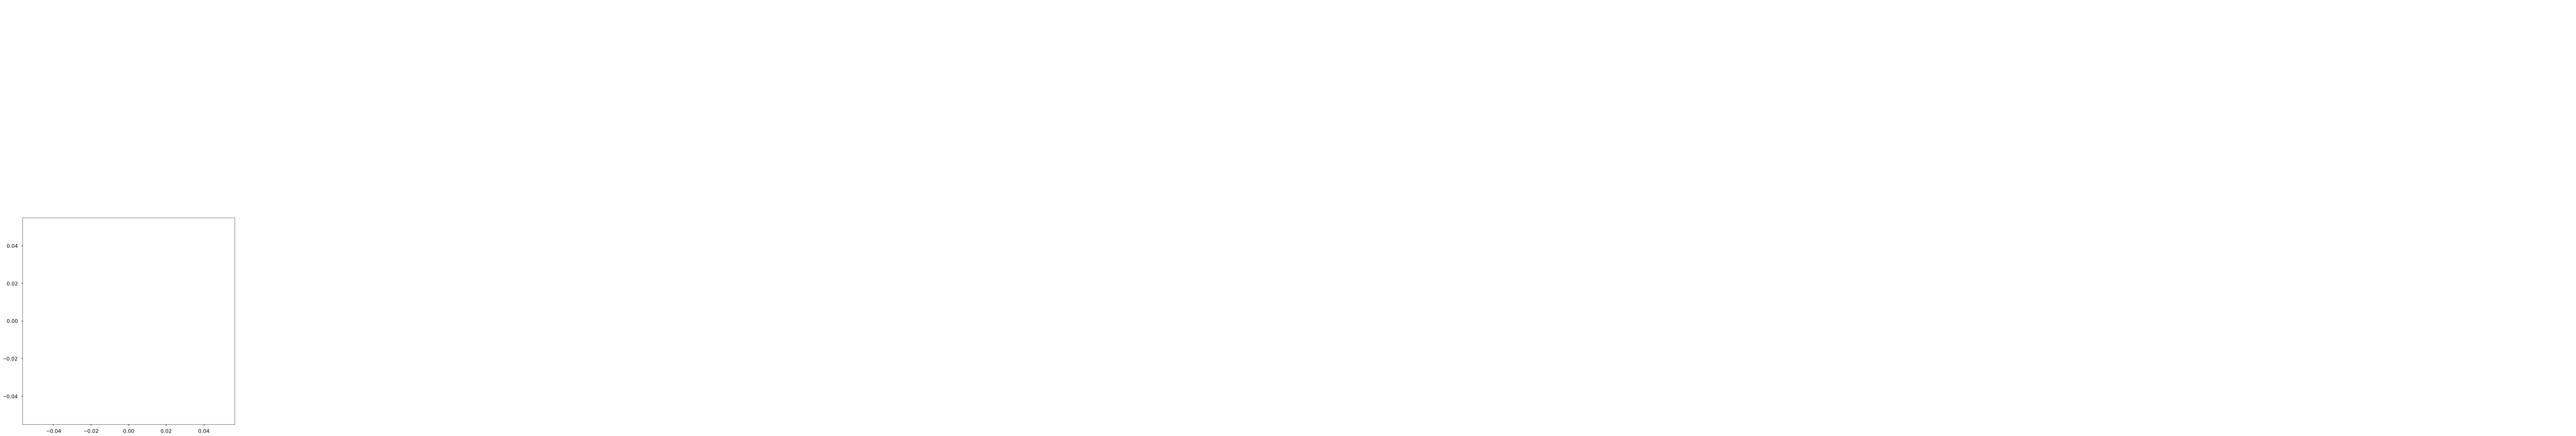

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('equal')
# outer ring
mypie, _ = ax.pie(df_summ_qs, radius=1.3, labels=None, labeldistance=0.88, colors=greys,
                  textprops=dict(size = 1, color="w", weight="bold", ha="center"))
plt.setp(mypie, width=0.3, edgecolor='white')
# inner ring
mypie2, _ = ax.pie(df_summ.n, radius=1.3-0.3, labels=None, labeldistance=0.8, colors=palette)
plt.setp(mypie2, width=0.4, edgecolor='white')

# text inside
ax.text(0, 0, "{}\nsequences".format(df_summ.n.sum()), fontdict = dict(size = 21, ha = "center", va = "center"))

# IG Chain legend
ig_legend = plt.legend([Patch(color = x) for x in palette],
                       df_summ["Patient Chain"].unique(),
                       bbox_to_anchor=(1.2, 0), loc="lower right", title = "Patient Chain")
ig_legend.get_title().set_fontsize('21')
ax = plt.gca().add_artist(ig_legend)
# Q Score legend
legend=plt.legend([Patch(color = x) for x in greys],
           ["${}$".format(x.replace("<=", "\leq")) for x in df_summ["QScore"].unique()],
           
           bbox_to_anchor=(1.2, 1), loc="upper right", title = "Q Score")
legend.get_title().set_fontsize('21')

In [32]:
fig.savefig("fig_qs_patients.pdf", bbox_inches='tight')